### Relatório de Fechamento de Mercado por e-mail


!pip install pywin32

!pip install yfinance
!pip install mplcyberpunk


In [1]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk as cb
import win32com.client as win32

Pegar dados do yahoo Finance

In [2]:
codigosNegociacao = ["^BVSP","BRL=X", "EURBRL=X"]

hoje = datetime.datetime.now()
umAnoAtras = hoje - datetime.timedelta(days=365)
umMesAtras = hoje - datetime.timedelta(days=30)


dadosMercado = yf.download(codigosNegociacao, umAnoAtras, umMesAtras, hoje)

display(dadosMercado)

[*********************100%***********************]  3 of 3 completed


Adj Close                        Close                     \
               BRL=X EURBRL=X     ^BVSP     BRL=X EURBRL=X     ^BVSP   
Date                                                                   
2022-02-10  5.234500   5.9772  113359.0  5.234500   5.9772  113359.0   
2022-02-11  5.248700   5.9887  113572.0  5.248700   5.9887  113572.0   
2022-02-14  5.249956   5.9574  113807.0  5.249956   5.9574  113807.0   
2022-02-15  5.214000   5.8920  114660.0  5.214000   5.8920  114660.0   
2022-02-16  5.157900   5.8857  115181.0  5.157900   5.8857  115181.0   
...              ...      ...       ...       ...      ...       ...   
2023-01-05  5.430100   5.7585  107518.0  5.430100   5.7585  107518.0   
2023-01-06  5.349800   5.6262  108836.0  5.349800   5.6262  108836.0   
2023-01-09  5.224400   5.5592  109227.0  5.224400   5.5592  109227.0   
2023-01-10  5.253700   5.6373  110912.0  5.253700   5.6373  110912.0   
2023-01-11  5.198300   5.5797  111763.0  5.198300   5.5797  111763.0   

           Dividends                     High  ...       Low      Open  \
               BRL=X EURBRL=X ^BVSP     BRL=X  ...     ^BVSP     BRL=X   
Date                                           ...                       
2022-02-10       0.0      0.0   0.0  5.244600  ...  112163.0  5.231429   
2022-02-11       0.0      0.0   0.0  5.251200  ...  113128.0  5.248600   
2022-02-14       0.0      0.0   0.0  5.263300  ...  113358.0  5.250500   
2022-02-15       0.0      0.0   0.0  5.219900  ...  113882.0  5.213700   
2022-02-16       0.0      0.0   0.0  5.184725  ...  114816.0  5.158000   
...              ...      ...   ...       ...  ...       ...       ...   
2023-01-05       0.0      0.0   0.0  5.431100  ...  105333.0  5.430100   
2023-01-06       0.0      0.0   0.0  5.360859  ...  107642.0  5.349800   
2023-01-09       0.0      0.0   0.0  5.306400  ...  108134.0  5.224400   
2023-01-10       0.0      0.0   0.0  5.270648  ...  108478.0  5.253700   
2023-01-11       0.0      0.0   0.0  5.231500  ...  110752.0  5.198300   

                              Stock Splits                Volume           \
           EURBRL=X     ^BVSP        BRL=X EURBRL=X ^BVSP  BRL=X EURBRL=X   
Date                                                                        
2022-02-10   5.9756  112462.0          0.0      0.0   0.0      0        0   
2022-02-11   5.9872  113368.0          0.0      0.0   0.0      0        0   
2022-02-14   5.9574  113643.0          0.0      0.0   0.0      0        0   
2022-02-15   5.8925  113905.0          0.0      0.0   0.0      0        0   
2022-02-16   5.8857  114830.0          0.0      0.0   0.0      0        0   
...             ...       ...          ...      ...   ...    ...      ...   
2023-01-05   5.7550  105336.0          0.0      0.0   0.0      0        0   
2023-01-06   5.6275  107642.0          0.0      0.0   0.0      0        0   
2023-01-09   5.5592  108964.0          0.0      0.0   0.0      0        0   
2023-01-10   5.6352  109129.0          0.0      0.0   0.0      0        0   
2023-01-11   5.5813  110816.0          0.0      0.0   0.0      0        0   

                        
                 ^BVSP  
Date                    
2022-02-10  13267900.0  
2022-02-11  18602800.0  
2022-02-14  10757600.0  
2022-02-15  11649600.0  
2022-02-16  12052100.0  
...                ...  
2023-01-05  15512000.0  
2023-01-06  12626600.0  
2023-01-09  12047300.0  
2023-01-10  13697900.0  
2023-01-11  14461400.0  

[240 rows x 24 columns]

Manupular Dados

In [3]:
dadosFechamento = dadosMercado['Adj Close']

# colocar nome nas colunas
dadosFechamento.columns = ["dolar", "euro", "ibovespa"]

#pegar as 50 primeira linhas - ver dados faltantes
dadosFechamento.head(50)


,dolar,euro,ibovespa
Date,,,
2022-02-10,5.234500,5.9772,113359.0
2022-02-11,5.248700,5.9887,113572.0
2022-02-14,5.249956,5.9574,113807.0
2022-02-15,5.214000,5.8920,114660.0
2022-02-16,5.157900,5.8857,115181.0
2022-02-17,5.135800,5.8386,113528.0
2022-02-18,5.170600,5.8756,112768.0
2022-02-21,5.137500,5.8149,111725.0
2022-02-22,5.102700,5.7667,112892.0


In [4]:
#retirar as linhas que tenham NAN
dadosFechamento = dadosFechamento.dropna()

dadosFechamento.head(50)

,dolar,euro,ibovespa
Date,,,
2022-02-10,5.234500,5.9772,113359.0
2022-02-11,5.248700,5.9887,113572.0
2022-02-14,5.249956,5.9574,113807.0
2022-02-15,5.214000,5.8920,114660.0
2022-02-16,5.157900,5.8857,115181.0
2022-02-17,5.135800,5.8386,113528.0
2022-02-18,5.170600,5.8756,112768.0
2022-02-21,5.137500,5.8149,111725.0
2022-02-22,5.102700,5.7667,112892.0


In [5]:
# Dados do periodo y=year / m=month / q=quarter / w=week / d=day
dadosAnuais = dadosFechamento.resample("y").last()
dadosMensais = dadosFechamento.resample("m").last()
#opções ao last() / sum() para somar todas os dados / mean=media dos dados

dadosMensais


,dolar,euro,ibovespa
Date,,,
2022-02-28,5.1222,5.7298,113142.0
2022-03-31,4.7697,5.3198,119999.0
2022-04-30,4.9378,5.1837,107876.0
2022-05-31,4.7524,5.1176,111351.0
2022-06-30,5.1809,5.4098,98542.0
2022-07-31,5.1827,5.2797,103165.0
2022-08-31,5.1219,5.1318,109523.0
2022-09-30,5.3962,5.3031,110037.0
2022-10-31,5.2885,5.2737,116037.0


Calculos - Retorno dia / mês/ ano

In [6]:
retornoAnual = dadosAnuais.pct_change()
retornoAnual

,dolar,euro,ibovespa
Date,,,
2022-12-31,NaN,NaN,NaN
2023-12-31,-0.013006,-0.00145,0.015741


In [7]:
#Não quero NaN
retornoAnual = dadosAnuais.pct_change().dropna()
retornoAnual

,dolar,euro,ibovespa
Date,,,
2023-12-31,-0.013006,-0.00145,0.015741


In [8]:
retornoMensal = dadosMensais.pct_change().dropna()
retornoMensal

,dolar,euro,ibovespa
Date,,,
2022-03-31,-0.068818,-0.071556,0.060605
2022-04-30,0.035243,-0.025584,-0.101026
2022-05-31,-0.037547,-0.012752,0.032213
2022-06-30,0.090165,0.057097,-0.115033
2022-07-31,0.000347,-0.024049,0.046914
2022-08-31,-0.011731,-0.028013,0.061629
2022-09-30,0.053554,0.033380,0.004693
2022-10-31,-0.019959,-0.005544,0.054527
2022-11-30,-0.003839,0.030813,-0.030602


In [9]:
retornoDiario = dadosFechamento.pct_change().dropna()
retornoDiario

,dolar,euro,ibovespa
Date,,,
2022-02-11,0.002713,0.001924,0.001879
2022-02-14,0.000239,-0.005227,0.002069
2022-02-15,-0.006849,-0.010978,0.007495
2022-02-16,-0.010760,-0.001069,0.004544
2022-02-17,-0.004285,-0.008002,-0.014351
...,...,...,...
2023-01-05,-0.008835,-0.003082,0.020734
2023-01-06,-0.014788,-0.022975,0.012258
2023-01-09,-0.023440,-0.011909,0.003593


Localizar Elementos no DF

In [10]:
#duas opções loc->seleciona apartir do nome ou iloc-> seleciona elementos matriz
retornoJan01 = retornoDiario.iloc[1,0]
print(retornoJan01)

0.00023929526182664418


In [11]:
#retornJan01 = retornoDiario.loc['2022-01-26', 'dolar']

retornoDiarioDolar = retornoDiario.iloc[-1, 0]
retornoDiarioEuro = retornoDiario.iloc[-1,1]
retornoDiarioIbovespa = retornoDiario.iloc[-1,2]
print(retornoDiarioDolar)
print(retornoDiarioEuro)
print(retornoDiarioIbovespa)

-0.010544929676114312
-0.01021766115235856
0.007672749567224413


In [12]:
retornoMensalDolar = retornoMensal.iloc[-1,0]
retornoMensalEuro = retornoMensal.iloc[-1,1]
retornoMensalIbovespa = retornoMensal.iloc[-1,2]
print(retornoMensalDolar)
print(retornoMensalEuro)
print(retornoMensalIbovespa)

-0.013006007996175795
-0.001449592463723448
0.01574101844025777


In [13]:
retornoAnualDolar = retornoAnual.iloc[-1,0]
retornoAnualEuro = retornoAnual.iloc[-1,1]
retornoAnualIbovespa = retornoAnual.iloc[-1,2]
print(retornoAnualDolar)
print(retornoAnualEuro)
print(retornoAnualIbovespa)

-0.013006007996175795
-0.001449592463723448
0.01574101844025777


Arrumar casas decimais para o relatório

In [14]:
retornoDiarioDolar = round(retornoDiarioDolar*100,2)
retornoDiarioEuro = round(retornoDiarioEuro*100,2)
retornoDiarioIbovespa = round(retornoDiarioIbovespa*100,2)
print(retornoDiarioDolar)
print(retornoDiarioEuro)
print(retornoDiarioIbovespa)

-1.05
-1.02
0.77


In [15]:
retornoMensalDolar = round(retornoMensalDolar*100,2)
retornoMensalEuro = round(retornoMensalEuro*100,2)
retornoMensalIbovespa = round(retornoMensalIbovespa*100,2)
print(retornoMensalDolar)
print(retornoMensalEuro)
print(retornoMensalIbovespa)

-1.3
-0.14
1.57


In [16]:
retornoAnualDolar = round(retornoAnualDolar*100,2)
retornoAnualEuro = round(retornoAnualEuro*100,2)
retornoAnualIbovespa = round(retornoAnualIbovespa*100,2)
print(retornoAnualDolar)
print(retornoAnualEuro)
print(retornoAnualIbovespa)

-1.3
-0.14
1.57


Graficos

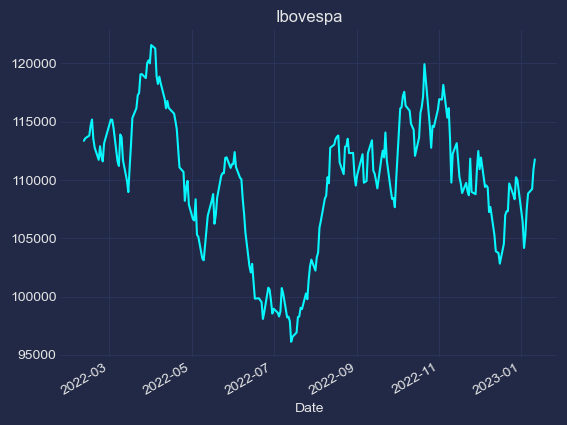

In [17]:
plt.style.use("cyberpunk")
#plotar o grafico
dadosFechamento.plot(y="ibovespa", use_index = True, legend = False)
#colocar um titulo
plt.title("Ibovespa")
#salvar figura-grafico
plt.savefig("ibovespa.png", dpi=300)

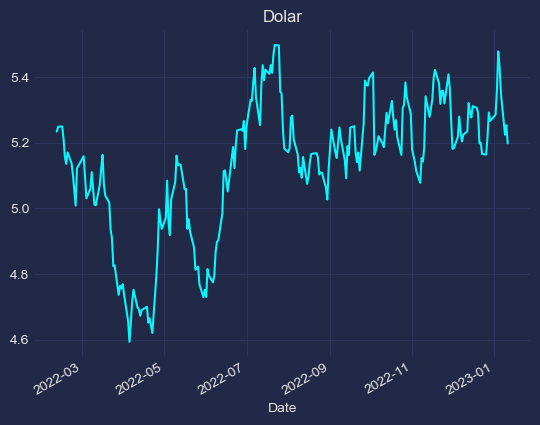

In [18]:
dadosFechamento.plot(y="dolar", use_index = True, legend = False)
plt.title("Dolar")
plt.savefig("dolar.png", dpi=300)

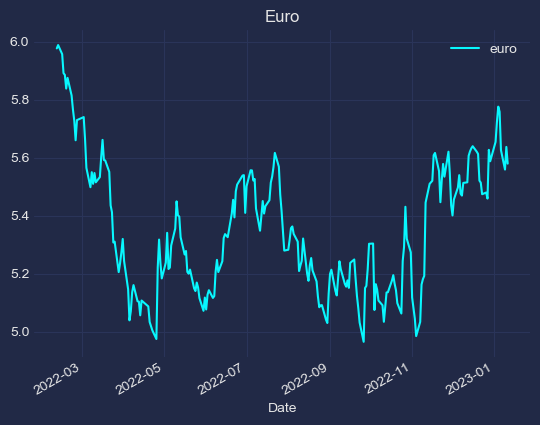

In [19]:
dadosFechamento.plot(y="euro", use_index = True)
plt.title("Euro")
plt.savefig("euro.png", dpi=300)

    Enviar email

In [20]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [22]:
email.To ="dsantana77@gmail.com"
email.Subject = "relatorio diário"
email.Body = f'''Prezado diretor, segue o relatório diário:

Ibovespa:
No ano o Ibovespa está tendo uma rentabilidade de {retornoAnualIbovespa}%, 
enquanto no mês a rentabilidade é de {retornoMensalIbovespa}%.
No último dia útil, o fechamento do Ibovespa foi de {retornoDiarioIbovespa}%.

Dólar:
No ano o Dólar está tendo uma rentabilidade de {retornoAnualDolar}%, 
enquanto no mês a rentabilidade é de {retornoMensalDolar}%.
No último dia útil, o fechamento do Dólar foi de {retornoDiarioDolar}%.

Euro:
No ano o Euro está tendo uma rentabilidade de {retornoAnualEuro}%, 
enquanto no mês a rentabilidade é de {retornoMensalEuro}%.
No último dia útil, o fechamento do Euro foi de {retornoDiarioEuro}%.


Abs,

O melhor estagiário do mundo

'''

anexo_ibovespa = r'C:\Users\dsant\Downloads\Python Varo\Python Finanças\ibovespa.png'
anexo_dolar = r'C:\Users\dsant\Downloads\Python Varo\Python Finanças\dolar.png'
anexo_euro = r'C:\Users\dsant\Downloads\Python Varo\Python Finanças\euro.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_euro)

email.Send()